# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

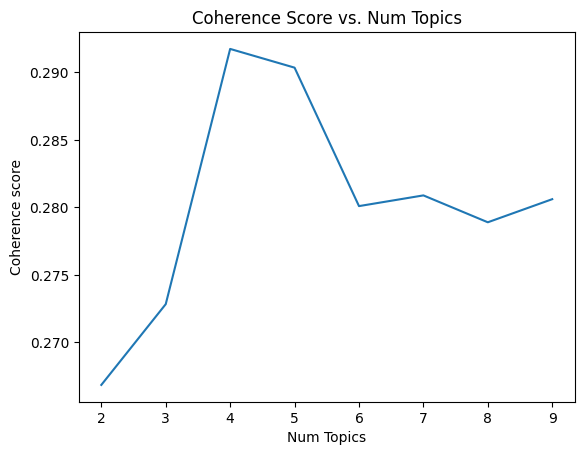

Num Topics = 2  has Coherence Value of 0.2668
Num Topics = 3  has Coherence Value of 0.2728
Num Topics = 4  has Coherence Value of 0.2917
Num Topics = 5  has Coherence Value of 0.2904
Num Topics = 6  has Coherence Value of 0.2801
Num Topics = 7  has Coherence Value of 0.2809
Num Topics = 8  has Coherence Value of 0.2789
Num Topics = 9  has Coherence Value of 0.2806
Optimal number of topics: 4
Topics:
Topic 1: ['text', 'Text', 'to', 'categories', 'tasks', 'involve', 'data.', 'assigning', 'classification', 'fascinating']
Topic 2: ['is', 'area', 'language', 'text', 'fascinating', 'key', 'processing', 'in', 'Machine', 'a']
Topic 3: ['is', 'text', 'mining.', 'Natural', 'a', 'powerful.', 'processing', 'key', 'in', 'area']
Topic 4: ['is', 'learning', 'fascinating', 'text', 'Machine', 'and', 'language', 'classification', 'in', 'powerful.']


In [1]:
# Write your code here
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora import Dictionary

class TopicModel:
    def __init__(self, data, start=2, limit=10, step=1):
        self.data = data
        self.start = start
        self.limit = limit
        self.step = step
        self.tokenized_data = [doc.split() for doc in data]
        self.dictionary = Dictionary(self.tokenized_data)
        self.corpus = [self.dictionary.doc2bow(doc) for doc in self.tokenized_data]
#Evaluate the coherence values for different numbers of topics
    def evaluate_coherence(self):
        coherence_values = []
        model_list = []
        for num_topics in range(self.start, self.limit, self.step):
            model = LdaModel(corpus=self.corpus, id2word=self.dictionary, num_topics=num_topics)
            model_list.append(model)
            coherencemodel = CoherenceModel(model=model, texts=self.tokenized_data, dictionary=self.dictionary, coherence='c_v')
            coherence_values.append(coherencemodel.get_coherence())
        self.model_list = model_list
        self.coherence_values = coherence_values
#Display a plot of coherence scores against the number of topics.
    def display_coherence(self):
        x = range(self.start, self.limit, self.step)
        plt.plot(x, self.coherence_values)
        plt.xlabel("Num Topics")
        plt.ylabel("Coherence score")
        plt.title("Coherence Score vs. Num Topics")
        plt.show()
#Print the coherence scores for different numbers of topics.
    def show_coherence_scores(self):
        for m, cv in zip(range(self.start, len(self.coherence_values) + self.start), self.coherence_values):
            print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

    def train_model(self):
        optimal_num_topics = self.coherence_values.index(max(self.coherence_values)) + self.start
        self.model = self.model_list[optimal_num_topics - self.start]
        self.optimal_num_topics = optimal_num_topics

    def display_topics(self):
        print("Optimal number of topics:", self.optimal_num_topics)
        print("Topics:")
        for topic_id in range(self.optimal_num_topics):
            topic_words = self.model.show_topic(topic_id, topn=10)
            words = [word for word, _ in topic_words]
            print(f"Topic {topic_id + 1}: {words}")

# Sample text data
data = [
    "Machine learning is fascinating and powerful.",
    "Text classification tasks involve assigning categories to text data.",
    "Natural language processing is a key area in text mining.",
]

# Create and run LDA model
model = TopicModel(data)
model.evaluate_coherence()
model.display_coherence()
model.show_coherence_scores()
model.train_model()
model.display_topics()

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

Num Topics = 2  has Coherence Value of 0.28059393052760795
Num Topics = 3  has Coherence Value of 0.2917264933755584
Num Topics = 4  has Coherence Value of 0.2917264933755584
Num Topics = 5  has Coherence Value of 0.2784211494171021
Num Topics = 6  has Coherence Value of 0.27897105954284523
Num Topics = 7  has Coherence Value of 0.2784211494171021


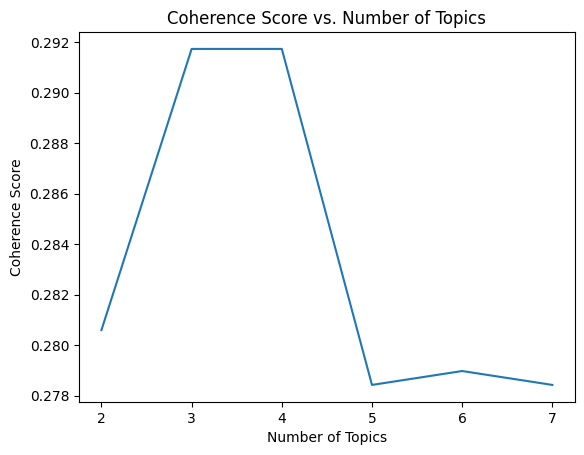

Optimal number of topics: 2
Topics:
Topic 1: text, is, area, Natural, a, key, in, language, processing, mining.
Topic 2: involve, assigning, tasks, data., classification, categories, to, Text, is, Natural


In [2]:
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

# Sample text data
data = [
    "Machine learning is fascinating and powerful.",
    "Text classification tasks involve assigning categories to text data.",
    "Natural language processing is a key area in text mining.",
]

# Load text data
document_list = [document.split() for document in data]

# Prepare corpus
dictionary = corpora.Dictionary(document_list)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in document_list]

# Compute coherence values
coherence_scores = []
model_list = []
for num_topics in range(2, 8, 1):
    model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=document_list, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print(f"Num Topics = {num_topics}  has Coherence Value of {coherence_score}")
    coherence_scores.append(coherence_score)

# Plot coherence scores
num_topics_range = range(2, 8, 1)
plt.plot(num_topics_range, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

# Determine the number of topics
optimal_num_topics = 2  # Adjust based on coherence score plot
print(f"Optimal number of topics: {optimal_num_topics}")

# Create LSA model
lsa_model = LsiModel(doc_term_matrix, num_topics=optimal_num_topics, id2word=dictionary)
topics = lsa_model.show_topics(num_topics=optimal_num_topics, num_words=10, formatted=False)
print("Topics:")
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join([word for word, _ in topic[1]])}")


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

  Preparing metadata (setup.py) ... done
  Created wheel for lda2vec: filename=lda2vec-0.16.10-py3-none-any.whl size=14410 sha256=6ac61affc107879c62467b6c4190e4855a29a4b2ec61f8753d45982eac0847b1
  Stored in directory: /root/.cache/pip/wheels/1e/90/24/a97126c0fe8b479ba3bb79d3b18ebaab571a18d90bb2967ab6
Successfully built lda2vec


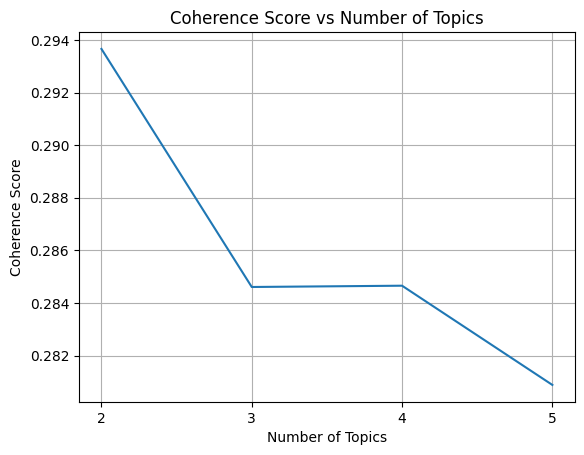

Best number of topics: 2
Best coherence score: 0.2936578802798682
Summarized Topics:
Topic 0: text, data., involve, assigning, categories
Topic 1: is, language, a, area, key


In [3]:
# Write your code here
!pip install lda2vec
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Sample text data
data_samples = [
    "Machine learning is fascinating and powerful.",
    "Text classification tasks involve assigning categories to text data.",
    "Natural language processing is a key area in text mining.",
]


# Tokenize the data and create a dictionary
tokenized_samples = [doc.lower().split() for doc in data_samples]
word_dictionary = corpora.Dictionary(tokenized_samples)

# Create a corpus
word_corpus = [word_dictionary.doc2bow(text) for text in tokenized_samples]

# Train the LDA model with different values of K
coherence_scores = []
for num_topics in range(2, 6):  # You can adjust the range of K as needed
    lda_model = LdaModel(corpus=word_corpus, id2word=word_dictionary, num_topics=num_topics, passes=10)

    # Calculate coherence scores for each set of generated topics
    coherence_evaluator = CoherenceModel(model=lda_model, texts=tokenized_samples, dictionary=word_dictionary, coherence='c_v')
    coherence_score = coherence_evaluator.get_coherence()
    coherence_scores.append((num_topics, coherence_score))

# Choose the number of topics K that maximizes the coherence score
best_num_topics, best_coherence_score = max(coherence_scores, key=lambda x: x[1])

# Plotting the graph of coherence scores
num_topics, coherence_scores = zip(*coherence_scores)
plt.plot(num_topics, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs Number of Topics")
plt.xticks(num_topics)
plt.grid(True)
plt.show()

# Print the best number of topics and their coherence score
print("Best number of topics:", best_num_topics)
print("Best coherence score:", best_coherence_score)

# Summarize the topics generated with the chosen value of K
lda_model = LdaModel(corpus=word_corpus, id2word=word_dictionary, num_topics=best_num_topics, passes=10)
topics = lda_model.print_topics(num_words=5)  # Adjust the number of words per topic as needed

# Print and summarize the topics
print("Summarized Topics:")
for topic_id, topic_words in topics:
    # Extract only the words from the topic string
    topic_words = [word.split("*")[1].strip().strip('"') for word in topic_words.split(" + ")]
    print(f"Topic {topic_id}: {', '.join(topic_words)}")


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [4]:
%%capture
!pip install bertopic

In [ ]:
from bertopic import BERTopic

# Sample text data
data_samples = [
    "Machine learning is fascinating and powerful.",
    "Text classification tasks involve assigning categories to text data.",
    "Natural language processing is a key area in text mining.",
]

# Step 1: Instantiate BERTopic and fit_transform the data
model = BERTopic(language="english")
topics, _ = model.fit_transform(data_samples)

# Step 2: Summarize the topics obtained
top_words = model.get_topics()

for topic, words in top_words.items():
    print(f"Topic {topic}: {', '.join(words)}")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
"""
The choice which alogirthm is better depends upon the data. Here I used sample text data.

Based on the results of all three algorithms, it seems that lda2vec is better
 by considering the coherence score metric which indicates that the topics generated
 are more coherent and interpretable compared to the remaining two algorithms LDA and LSA.
The higher coherence score suggests that the topics are more meaningful.
"""


'\nThe choice which alogirthm is better depends upon the data. Here I used sample text data. \n\nBased on the results of all three algorithms, it seems that lda2vec is better\n by considering the coherence score metric which indicates that the topics generated \n are more coherent and interpretable compared to the remaining two algorithms LDA and LSA.\nThe higher coherence score suggests that the topics are more meaningful. \n'

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Learned how to find main topics in text using the above four methods LDA, LSA, lda2vc, BERTopic.
Even though I have reference codes, it was somewhat difficult to work on these methods.
Coming to the question, I faced issue with the type error k>=N. I tried different methods
like reduction the numer of topics (k), converted sprase matric to dense and used scipy.linalg.eigh.
And some minor challenges with the lda2vc method.
This exercise is related to the field of NLP where we are organizing the texts into topics,
summarizig which are important for NLP.

'''